In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve,auc,plot_confusion_matrix, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, f1_score

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import json


## Problem Statement

predict the patient has heart decease or not by using supervised machine learning algorithem by considering logistic regression

## Data Gathring

In [2]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


eda

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df["age"].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

In [5]:
df["age"].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

In [6]:
df["sex"].unique()

array([1, 0], dtype=int64)

In [7]:
df["sex"].value_counts()


1    207
0     96
Name: sex, dtype: int64

In [8]:
df["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

In [9]:
df["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [10]:
df["trestbps"].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

In [11]:
df["trestbps"].value_counts()

120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: trestbps, dtype: int64

In [12]:
df["chol"].unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131], dtype=int64)

In [13]:
df["chol"].value_counts()

204    6
197    6
234    6
269    5
254    5
      ..
284    1
224    1
167    1
276    1
131    1
Name: chol, Length: 152, dtype: int64

In [14]:
df["fbs"].unique()

array([1, 0], dtype=int64)

In [15]:
df["fbs"].value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [16]:
df["restecg"].unique()

array([0, 1, 2], dtype=int64)

In [17]:
df["restecg"].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [18]:
df["thalach"].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

In [19]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

In [20]:
df["exang"].unique()

array([0, 1], dtype=int64)

In [21]:
df["exang"].value_counts()

0    204
1     99
Name: exang, dtype: int64

In [22]:
df["oldpeak"].unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

In [23]:
df["oldpeak"].value_counts()

0.0    99
1.2    17
1.0    14
0.6    14
1.4    13
0.8    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.8     6
2.6     6
1.5     5
3.0     5
1.9     5
0.5     5
3.6     4
2.2     4
2.4     3
0.9     3
3.4     3
4.0     3
0.3     3
2.3     2
3.2     2
2.5     2
4.2     2
1.1     2
3.1     1
0.7     1
3.5     1
6.2     1
1.3     1
5.6     1
2.9     1
2.1     1
3.8     1
4.4     1
Name: oldpeak, dtype: int64

In [24]:
df["slope"].unique()

array([0, 2, 1], dtype=int64)

In [25]:
df["slope"].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [26]:
df["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [27]:
df["ca"].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [28]:
df["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

In [29]:
df["thal"].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [30]:
df["target"].unique()

array([1, 0], dtype=int64)

In [31]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

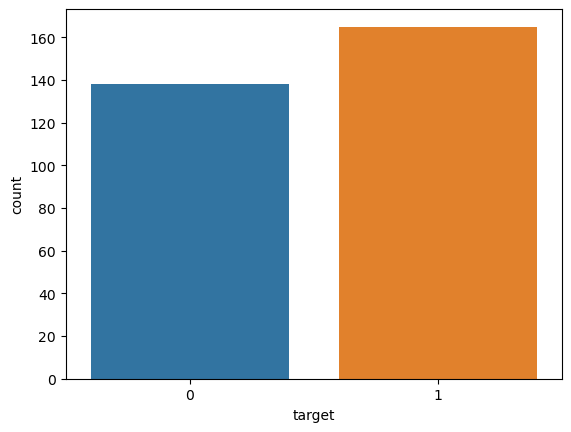

In [32]:
sns.countplot(df["target"])

### identify missing values

In [33]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### detect outliers

<AxesSubplot:>

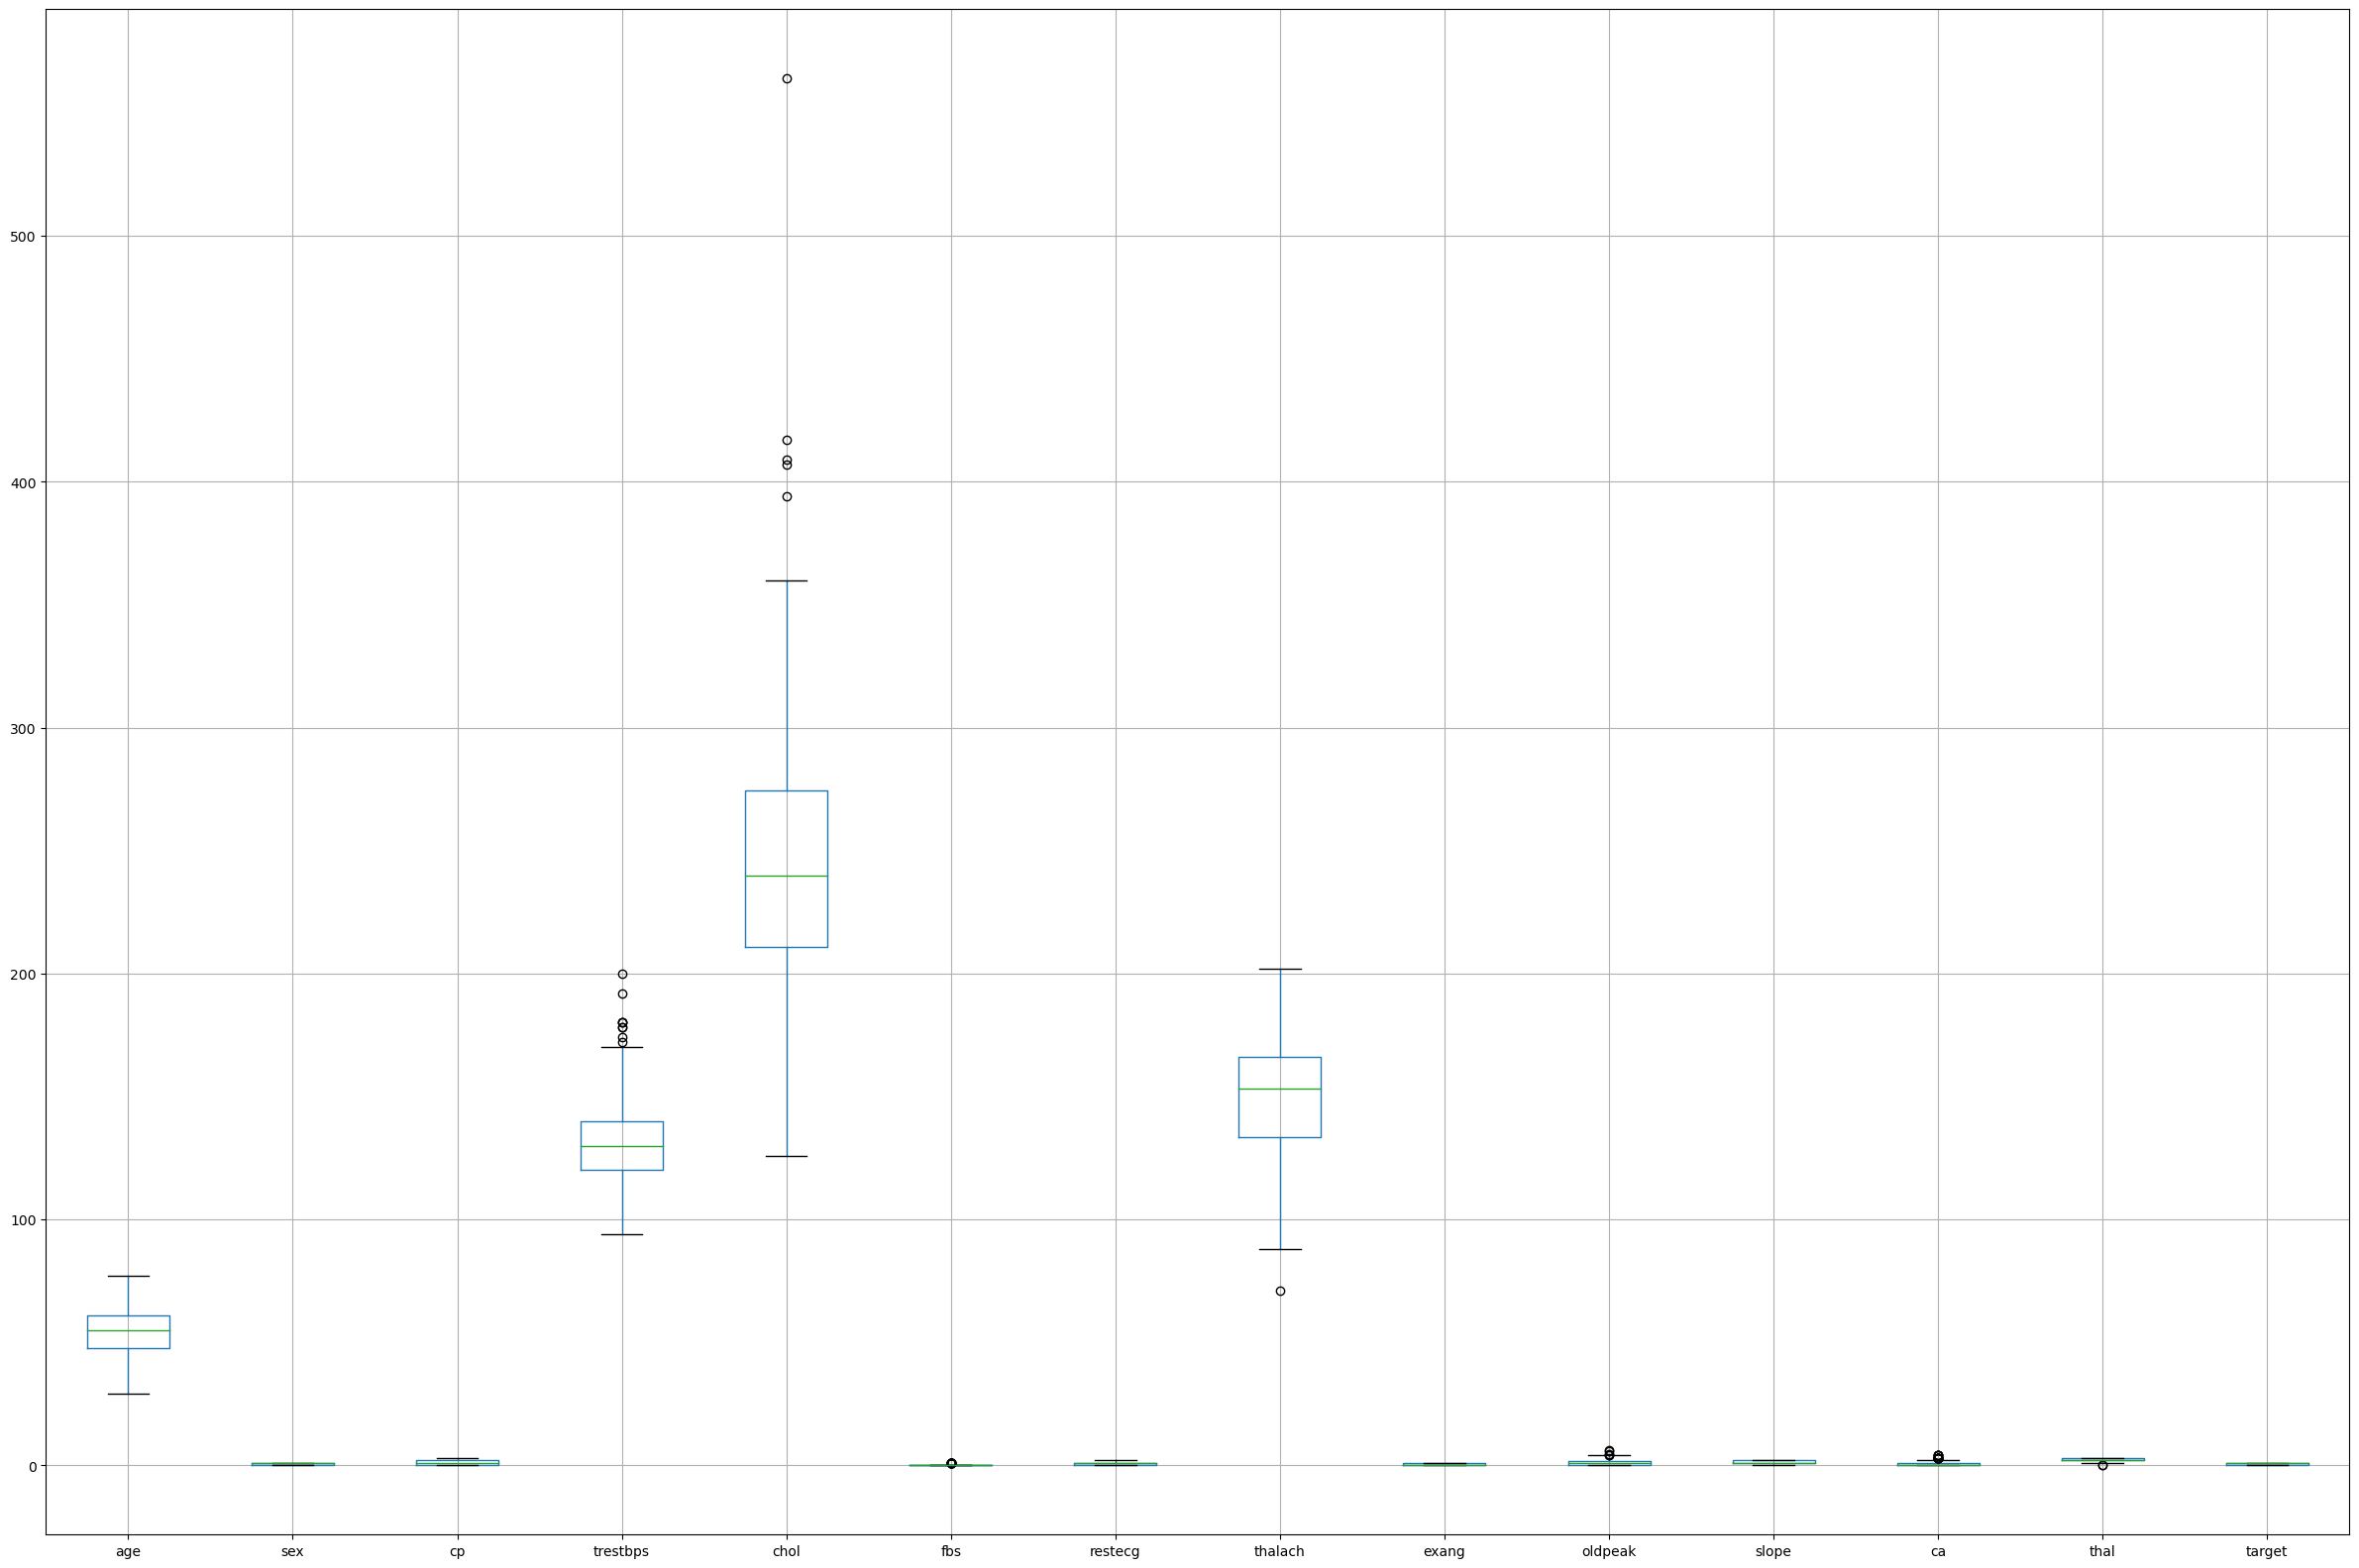

In [34]:
plt.figure(figsize = (30,20)),
df.boxplot()

## Feature Engineering

In [35]:
x = df.iloc[:,:-1]

y = df.iloc[:,-1:]



In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10,stratify=y)

<AxesSubplot:xlabel='trestbps'>

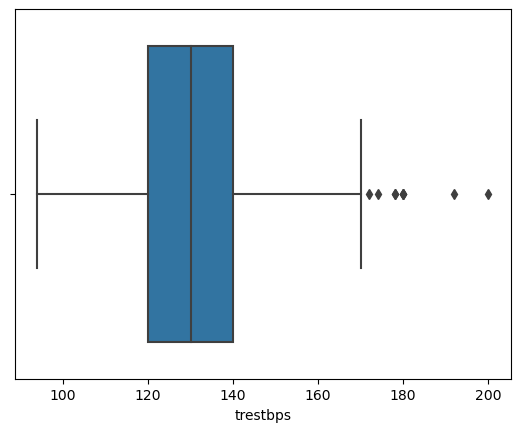

In [37]:
sns.boxplot(x = df["trestbps"])

In [38]:
q1=df["trestbps"].quantile(0.25)
q2=df["trestbps"].quantile(0.50)
q3=df["trestbps"].quantile(0.75)

iqr=q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print("upper_tail:",upper_tail)
print("lower_tail:",lower_tail)


upper_tail: 170.0
lower_tail: 90.0


<AxesSubplot:xlabel='trestbps'>

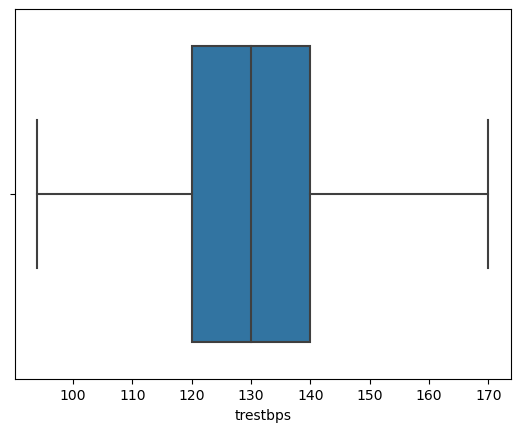

In [39]:
df["trestbps"].loc[(df["trestbps"]>upper_tail)|(df["trestbps"]<lower_tail)]
mean_normalize=df["trestbps"].loc[(df["trestbps"]<=upper_tail)&(df["trestbps"]>=lower_tail)].mean()
df.loc[(df["trestbps"]>upper_tail)|(df["trestbps"]<lower_tail)]=mean_normalize
df["trestbps"].loc[(df["trestbps"]>upper_tail)|(df["trestbps"]<lower_tail)]
sns.boxplot(df["trestbps"])

<AxesSubplot:xlabel='chol'>

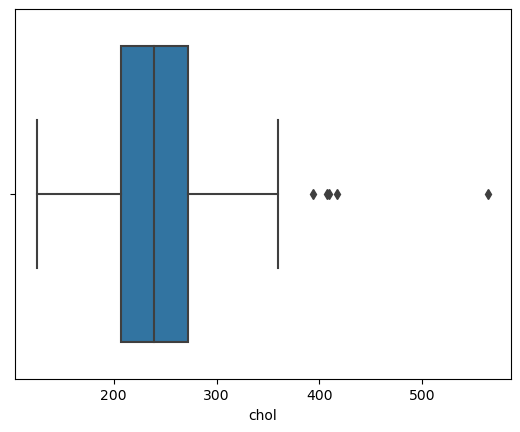

In [40]:
sns.boxplot(x = df["chol"])

In [41]:
q1=df["chol"].quantile(0.25)
q2=df["chol"].quantile(0.50)
q3=df["chol"].quantile(0.75)

iqr=q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print("upper_tail:",upper_tail)
print("lower_tail:",lower_tail)



upper_tail: 369.5
lower_tail: 109.5


<AxesSubplot:xlabel='chol'>

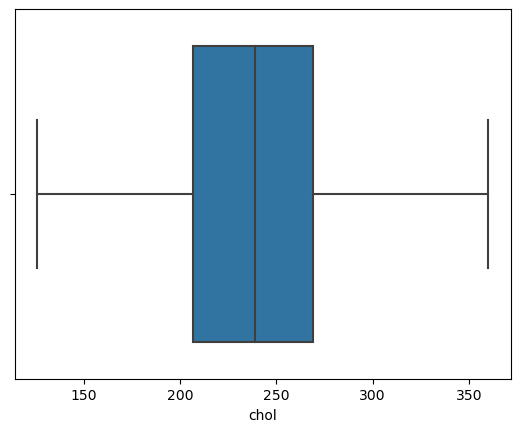

In [42]:
df["chol"].loc[(df["chol"]>upper_tail)|(df["chol"]<lower_tail)]
mean_normalize=df["chol"].loc[(df["chol"]<=upper_tail)& (df["chol"]>=lower_tail)].mean()
df.loc[(df["chol"]>upper_tail)|(df["chol"]<lower_tail)]=mean_normalize
df["chol"].loc[(df["chol"]>upper_tail)|(df["chol"]<lower_tail)]
sns.boxplot(df["chol"])

<AxesSubplot:xlabel='oldpeak'>

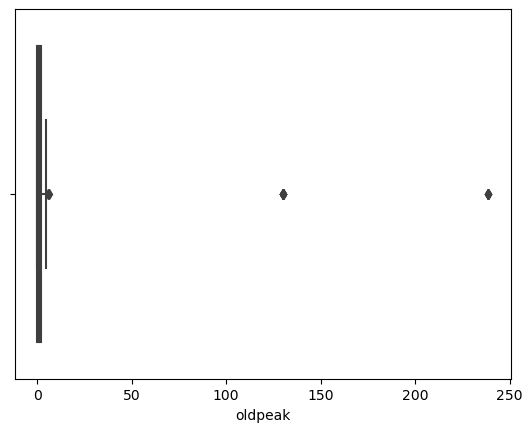

In [43]:
sns.boxplot(x = df["oldpeak"])

upper_tail: 4.5
lower_tail: -2.7


<AxesSubplot:xlabel='oldpeak'>

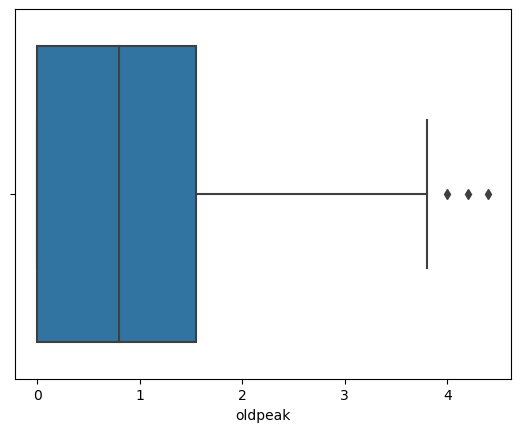

In [44]:
q1=df["oldpeak"].quantile(0.25)
q2=df["oldpeak"].quantile(0.50)
q3=df["oldpeak"].quantile(0.75)

iqr=q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print("upper_tail:",upper_tail)
print("lower_tail:",lower_tail)

df["oldpeak"].loc[(df["oldpeak"]>upper_tail)|(df["oldpeak"]<lower_tail)]
mean_oldpeak=df["oldpeak"].loc[(df["oldpeak"]<=upper_tail)&
                                             (df["oldpeak"]>=lower_tail)].mean()
df.loc[(df["oldpeak"]>upper_tail)|(df["oldpeak"]<lower_tail)]=mean_oldpeak
df["oldpeak"].loc[(df["oldpeak"]>upper_tail)|(df["oldpeak"]<lower_tail)]
sns.boxplot(df["oldpeak"])

<AxesSubplot:xlabel='oldpeak'>

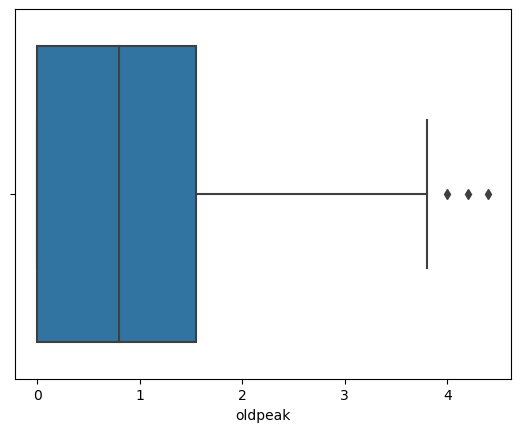

In [45]:
df["oldpeak"].loc[(df["oldpeak"]>upper_tail)|(df["oldpeak"]<lower_tail)]
mean_oldpeak=df["oldpeak"].loc[(df["oldpeak"]<=upper_tail)&(df["oldpeak"]>=lower_tail)].mean()
df.loc[(df["oldpeak"]>upper_tail)|(df["oldpeak"]<lower_tail)]=mean_oldpeak
df["oldpeak"].loc[(df["oldpeak"]>upper_tail)|(df["oldpeak"]<lower_tail)]
sns.boxplot(df["oldpeak"])

## Model Building

In [46]:
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression()

## Model Evaluation

### training dataset

Accuracy:
 0.8458149779735683
**************************************************
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82        90
           1       0.91      0.82      0.87       137

    accuracy                           0.85       227
   macro avg       0.84      0.85      0.84       227
weighted avg       0.85      0.85      0.85       227

**************************************************


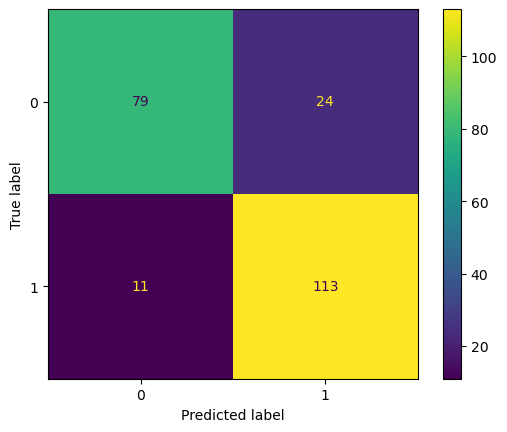

In [47]:
y_pred_train = logistic_model.predict(x_train)

plot_confusion_matrix(logistic_model, x_train , y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print("Accuracy:\n",accuracy)
print("*"*50)

print("Classification report:\n",clf_report)
print("*"*50)




accuracy --> 0.868421052631579
clf_report -->               precision    recall  f1-score   support

           0       0.83      0.88      0.85        33
           1       0.90      0.86      0.88        43

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



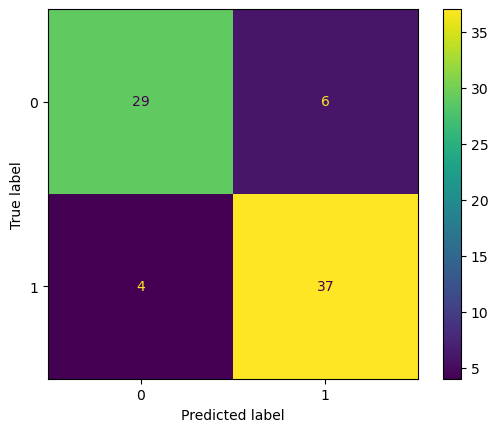

In [48]:
y_pred_test = logistic_model.predict(x_test)

plot_confusion_matrix(logistic_model,x_test,y_test)

accuracy = accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)

print("accuracy -->", accuracy)

print("clf_report -->",clf_report)

### find the best threshold value

In [49]:
y_pred_train_proba = logistic_model.predict_proba(x_train)[:,1]

In [50]:
fpr,tpr, thresh = roc_curve(y_train , y_pred_train_proba)
thresh

array([1.99401865, 0.99401865, 0.95075786, 0.9493523 , 0.93278584,
       0.93260149, 0.89643977, 0.89209745, 0.87622971, 0.87438155,
       0.86169355, 0.85431459, 0.77219149, 0.76887515, 0.7493658 ,
       0.74545641, 0.74212272, 0.74091358, 0.72538694, 0.7198297 ,
       0.71793792, 0.70702851, 0.70505937, 0.70387106, 0.69021222,
       0.68686792, 0.68341733, 0.68153735, 0.6804144 , 0.67427956,
       0.63025582, 0.62725025, 0.59805211, 0.59461225, 0.57875198,
       0.53965417, 0.53709165, 0.5325344 , 0.51706359, 0.46861475,
       0.44079867, 0.43790135, 0.43270432, 0.40367014, 0.35849955,
       0.25969943, 0.25800803, 0.25059213, 0.22297416, 0.13259324,
       0.11845525, 0.09011141, 0.08391797, 0.05814308, 0.05767585,
       0.00232025])

In [51]:
threshold_values = [0.3,0.4,0.5,0.6,0.7,0.8,0.9]

df = pd.DataFrame()

for i in threshold_values:
    prediction = (logistic_model.predict_proba(x_train)[:,1] > i).astype(int)
    
    df1 = pd.DataFrame(data=[accuracy_score(y_train, prediction), recall_score(y_train, prediction), precision_score(y_train, prediction), f1_score(y_train, prediction)],
                       index=["Accuracy", "recall", "Precision", "F1-Score"])
    
    df = pd.concat([df,df1], axis = 1)
    
df.columns = threshold_values
df

,0.3,0.4,0.5,0.6,0.7,0.8,0.9
Accuracy,0.819383,0.823789,0.845815,0.845815,0.806167,0.735683,0.643172
recall,0.959677,0.943548,0.911290,0.846774,0.733871,0.556452,0.362903
Precision,0.767742,0.780000,0.824818,0.867769,0.892157,0.932432,0.957447
F1-Score,0.853047,0.854015,0.865900,0.857143,0.805310,0.696970,0.526316


In [52]:
# according to f1_score 0.5 threshold value is best value

In [53]:
np.where(thresh >= 0.499999)[0][-1]

38

In [54]:
thresh[38]

0.5170635941230782

In [55]:
fpr[38]

0.21359223300970873

In [56]:
tpr[38]

0.9112903225806451

In [57]:
auc(fpr,tpr)

0.9166144691512684

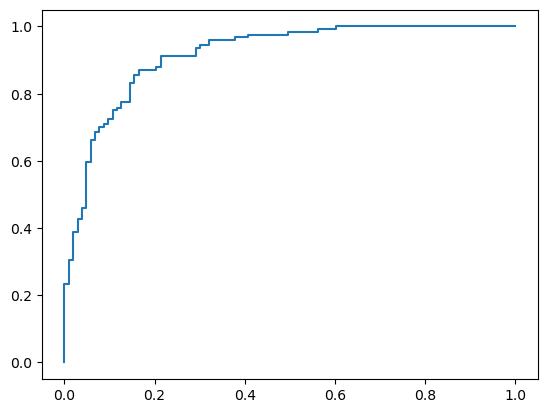

In [58]:
plt.plot(fpr,tpr)

In [59]:
y_pred_test_proba = logistic_model.predict_proba(x_test)[:,1]

In [60]:
fpr,tpr, thresh = roc_curve(y_test , y_pred_test_proba)
thresh

array([1.98894592, 0.98894592, 0.91235099, 0.90676933, 0.77975279,
       0.76013874, 0.67851305, 0.67263996, 0.56005683, 0.55331637,
       0.51367033, 0.51348717, 0.49652139, 0.26706773, 0.20189313,
       0.112059  , 0.09445851, 0.00697559])

In [61]:
threshold_values = [0.3,0.4,0.5,0.6,0.7,0.8,0.9]

df = pd.DataFrame()

for i in threshold_values:
    prediction = (logistic_model.predict_proba(x_test)[:,1] > i).astype(int)
    
    df1 = pd.DataFrame(data=[accuracy_score(y_test, prediction), recall_score(y_test, prediction), precision_score(y_test, prediction), f1_score(y_test, prediction)],
                       index=["Accuracy", "recall", "Precision", "F1-Score"])
    
    df = pd.concat([df,df1], axis = 1)
    
df.columns = threshold_values
df

,0.3,0.4,0.5,0.6,0.7,0.8,0.9
Accuracy,0.828947,0.881579,0.868421,0.855263,0.815789,0.763158,0.671053
recall,0.926829,0.926829,0.902439,0.804878,0.707317,0.585366,0.414634
Precision,0.791667,0.863636,0.860465,0.916667,0.935484,0.960000,0.944444
F1-Score,0.853933,0.894118,0.880952,0.857143,0.805556,0.727273,0.576271


In [62]:
# according to fi_score best threshold value is 0.5

In [63]:
np.where(thresh >= 0.499999)[0][-1]

11

In [64]:
fpr[11]

0.17142857142857143

In [65]:
tpr[11]

0.9024390243902439

In [66]:
auc(fpr,tpr)

0.9310104529616725

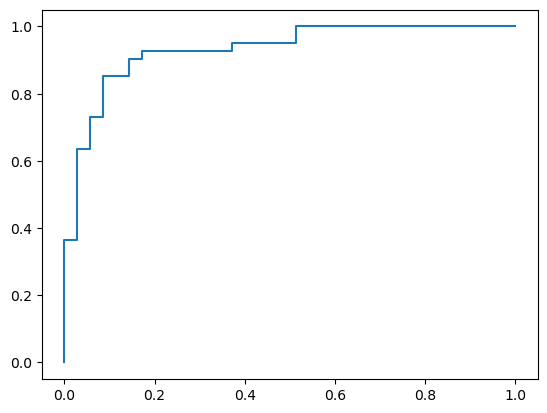

In [67]:
plt.plot(fpr,tpr)

### single user enter value

In [68]:
x.head(1).T

,0
age,63.0
sex,1.0
cp,3.0
trestbps,145.0
chol,233.0
fbs,1.0
restecg,0.0
thalach,150.0
exang,0.0
oldpeak,2.3


In [69]:
age = 63.0
sex = 1.0
cp = 3.0
trestbps = 145.0
chol = 233.0
fbs = 1.0
restecg = 0.0
thalach = 150.0
exang = 0.0
oldpeak = 2.3
slope = 0.0
ca = 0.0
thal = 1.0

In [70]:
test_array = np.zeros(len(x.columns))

test_array[0] = age
test_array[1] = sex
test_array[2] = cp
test_array[3] = trestbps
test_array[4] = chol
test_array[5] = fbs
test_array[6] = restecg
test_array[7] = thalach
test_array[8] = exang
test_array[9] = oldpeak
test_array[10] = slope
test_array[11] = ca
test_array[12] = thal

test_array


array([ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
         2.3,   0. ,   0. ,   1. ])

In [71]:
prediction = round(logistic_model.predict([test_array])[0],2)
if prediction == 0:
    print("'YOU' have heart decease")
else:
    print("'NO' you don't have heart decease")

'NO' you don't have heart decease


### create pickle file

In [72]:
with open("heart_model.pkl","wb")as file:
    pickle.dump(logistic_model,file)
    

In [73]:
columns_names = x.columns
columns_names

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [74]:
json_dict = ({"columns":list(columns_names)})
json_dict

{'columns': ['age',
  'sex',
  'cp',
  'trestbps',
  'chol',
  'fbs',
  'restecg',
  'thalach',
  'exang',
  'oldpeak',
  'slope',
  'ca',
  'thal']}

In [75]:
with open ("heart_json.json","w")as file:
    json.dump(json_dict,file)